In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import pandas as pd
import datetime as dt
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [63]:
company = 'BTC-USD'
start = dt.datetime(2012, 1, 1)
end = dt.datetime(2024, 1, 1)

data = yf.download(company, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed



In [64]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [65]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

/Users/oattao/Desktop/learn_trad/learntrad/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0163
Epoch 2/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0021
Epoch 3/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.0022
Epoch 4/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0018
Epoch 5/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0020
Epoch 6/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0015
Epoch 7/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - loss: 0.0013
Epoch 8/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0019
Epoch 9/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0015
Epoch 10/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0012
Epoch 11/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0011
Epoch 12/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0012
Epoch 13/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - loss: 0.0012
Epoch 14/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0012
Epoch 15/25
105/105 ━━━━━━━━━━━━━━━━━━━━ 5

In [66]:
test_start = dt.datetime(2021, 1, 1)
test_end = dt.datetime.now()

# Fetching test data using yfinance for the cryptocurrency
test_data = yf.download(company, start=test_start, end=test_end)
actual_prices = test_data['Close'].values

# Combine the datasets
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

# Prepare the test inputs
model_inputs = total_dataset[len(total_dataset) - len(test_data) - 60:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

[*********************100%%**********************]  1 of 1 completed



In [67]:
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)



40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


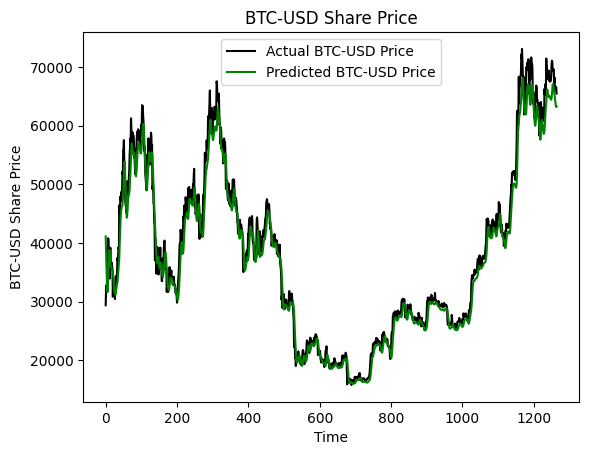

In [68]:
plt.plot(actual_prices, color='black', label=f'Actual {company} Price')
plt.plot(predicted_prices, color='green', label=f'Predicted {company} Price')
plt.title(f'{company} Share Price')
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

In [69]:
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs + 1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f'Prediction: {prediction}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
Prediction: [[63173.2]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
Prediction: [[63173.2]]
